# **LOAD DATA**

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"riskaseptianaa","key":"c54cac977ee4e4c3332d89212be8f076"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d olgabelitskaya/flower-color-images

flower-color-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "flower-color-images.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')

Berhasil


In [ ]:
!ls

FlowerColorImages.h5	 flower_images	sample_data
flower-color-images.zip  flowers


In [ ]:
%cd flowers/flowers

/content/flowers/flowers


In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

In [ ]:
from PIL import Image
import os, sys

path = ('/content/flowers/flowers')

def resize():
    if os.path.isfile(path):
        im = Image.open(path)
        f, e = os.path.splitext(path)
        imResize = im.resize((500,500), Image.ANTIALIAS)

resize()

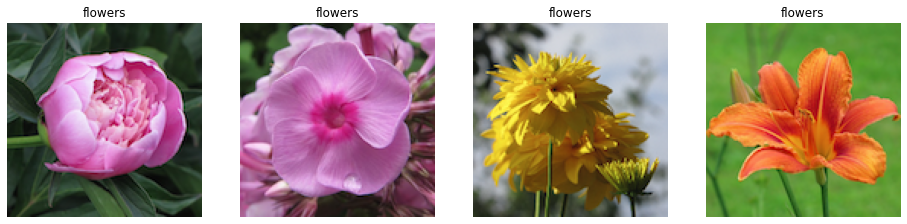

In [ ]:
base_dataset = '/content/flowers/flowers'

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_sco_pix = [os.path.join(base_dataset, fname)
                 for fname in os.listdir(base_dataset)[:4]]

for i, img_path in enumerate(next_sco_pix):
  sp = plt.subplot(2,4, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.title('flowers')
  plt.imshow(img)
plt.show()


# **COBA 1 GAMBAR**

In [ ]:
import numpy as np
from tqdm import tqdm
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import preprocess_input,Xception
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

In [ ]:
import cv2

img = cv2.imread('00_001.png')

print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 49152
- Shape/Dimensions: (128, 128, 3)


**Greyscale Image**

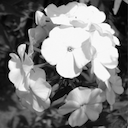

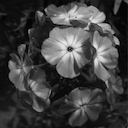

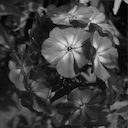

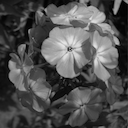

In [ ]:
from google.colab.patches import cv2_imshow

blue, green, red = cv2.split(img) # Split the image into its channels
img_gs = cv2.imread('00_001.png', cv2.IMREAD_GRAYSCALE) # Convert image to grayscale

cv2_imshow(red) # Display the red channel in the image
cv2_imshow(blue) # Display the red channel in the image
cv2_imshow(green) # Display the red channel in the image
cv2_imshow(img_gs) # Display the grayscale version of image

**Image Thresholding**

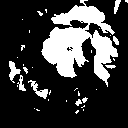

In [ ]:
import cv2

# Read image
img = cv2.imread('00_001.png', 0)

# Perform binary thresholding on the image with T = 125
r, threshold = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

**Noisy Image**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


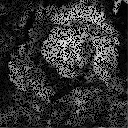

In [ ]:
import numpy as np

# Adding salt & pepper noise to an image
def salt_pepper(prob):
      # Extract image dimensions
      row, col = img_gs.shape

      # Declare salt & pepper noise ratio
      s_vs_p = 0.5
      output = np.copy(img_gs)

      # Apply salt noise on each pixel individually
      num_salt = np.ceil(prob * img_gs.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in img_gs.shape]
      output[coords] = 1

      # Apply pepper noise on each pixel individually
      num_pepper = np.ceil(prob * img_gs.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in img_gs.shape]
      output[coords] = 0
      cv2_imshow(output)

      return output

# Call salt & pepper function with probability = 0.5
# on the grayscale image of rose
sp_05 = salt_pepper(0.5)


In [ ]:
img_size =224

model = Xception(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')

83697664/83683744 [==============================] - 1s 0us/step


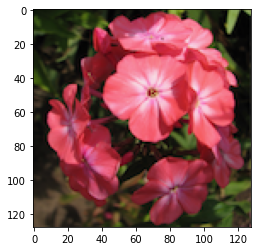

In [ ]:
plt.imshow(plt.imread('00_001.png'))
plt.show()

In [ ]:
img_path ='00_001.png'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
preprocessed_img

array([[[[-0.8980392 , -0.827451  , -0.92156863],
         [-0.8980392 , -0.827451  , -0.92156863],
         [-0.8901961 , -0.81960785, -0.92941177],
         ...,
         [ 0.05098045,  0.16078436, -0.3333333 ],
         [-0.01960784,  0.09803927, -0.38823527],
         [-0.01960784,  0.09803927, -0.38823527]],

        [[-0.8980392 , -0.827451  , -0.92156863],
         [-0.8980392 , -0.827451  , -0.92156863],
         [-0.8901961 , -0.81960785, -0.92941177],
         ...,
         [ 0.05098045,  0.16078436, -0.3333333 ],
         [-0.01960784,  0.09803927, -0.38823527],
         [-0.01960784,  0.09803927, -0.38823527]],

        [[-0.88235295, -0.8352941 , -0.92156863],
         [-0.88235295, -0.8352941 , -0.92156863],
         [-0.8901961 , -0.81960785, -0.92941177],
         ...,
         [ 0.14509809,  0.33333337, -0.24705881],
         [ 0.09019613,  0.23921573, -0.26274508],
         [ 0.09019613,  0.23921573, -0.26274508]],

        ...,

        [[-0.29411763, -0.41176468, -0

**Arithmatic**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
args = {
	"image": "00_001.png"
}

In [ ]:
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [ ]:
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


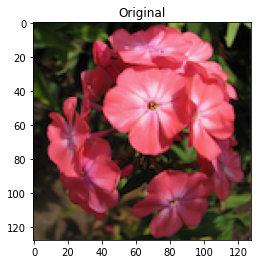

In [ ]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

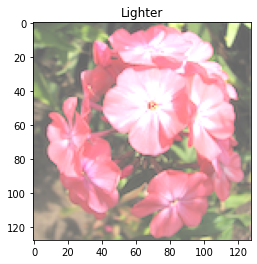

In [ ]:
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

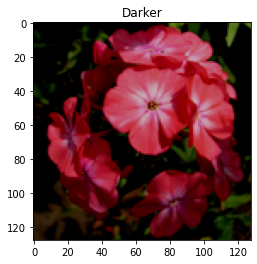

In [ ]:
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

**Cropping**

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
I = np.arange(0, 25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
I = I.reshape((5, 5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
I[0:3, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [ ]:
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

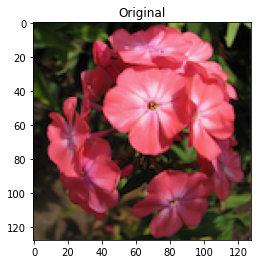

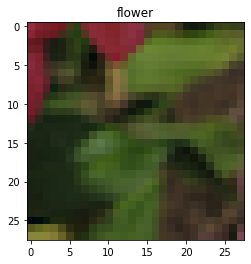

In [ ]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

flo = image[100:550, 100:500]
plt_imshow("flower", flo)

**Drawing**

In [ ]:
canvas = np.zeros((300, 300, 3), dtype="uint8")

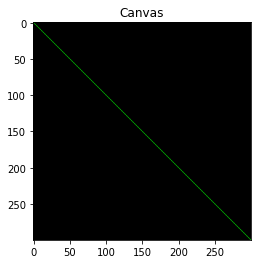

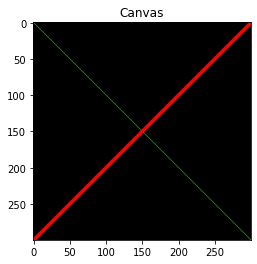

In [ ]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

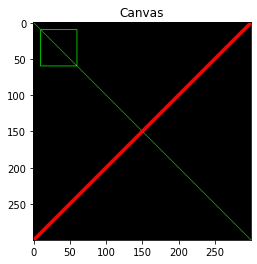

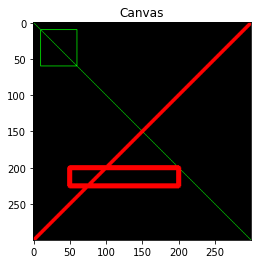

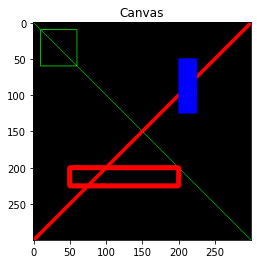

In [ ]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

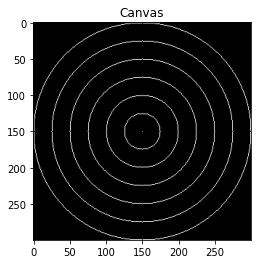

In [ ]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
	# draw a white circle with the current radius size
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

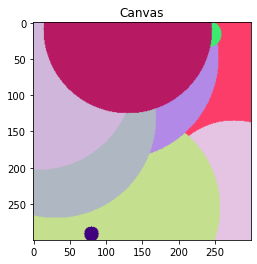

In [ ]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our screen
plt_imshow("Canvas", canvas)

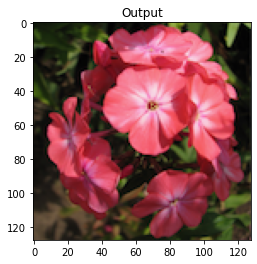

In [ ]:
# load the input image from disk
image = cv2.imread(args["image"])

cv2.rectangle(image, (400, 200), (1200, 600), (0, 255, 255), -1)
cv2.rectangle(image, (450, 250), (1150, 550), (0, 0, 255), 1)

# show the output image
plt_imshow("Output", image)

**Flipping**

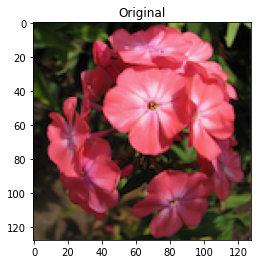

[INFO] flipping image horizontally...


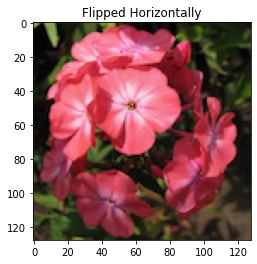

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


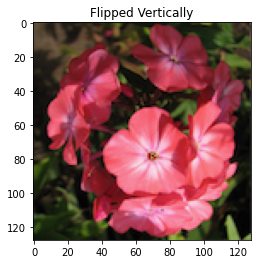

In [ ]:
# flip the image vertically
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


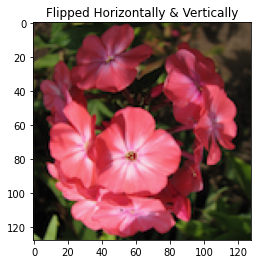

In [ ]:
# flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

**Masking**

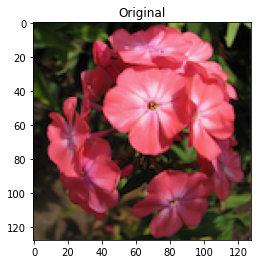

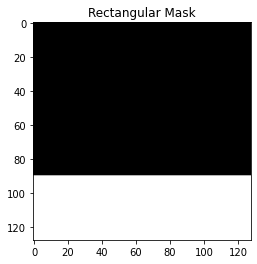

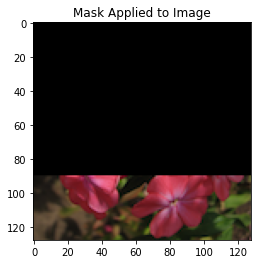

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

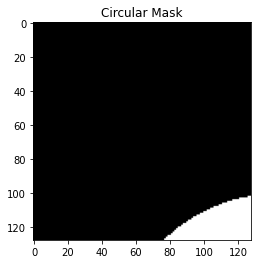

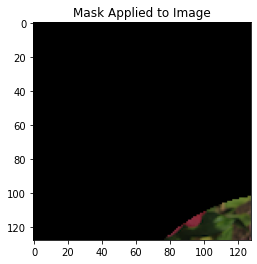

In [ ]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

**Pixel**

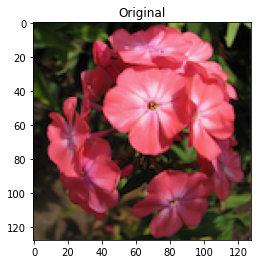

In [ ]:
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [ ]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 13, Green: 22, Blue: 10
Pixel at (50, 20) - Red: 118, Green: 23, Blue: 43
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


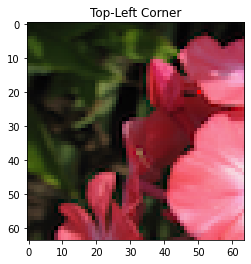

In [ ]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

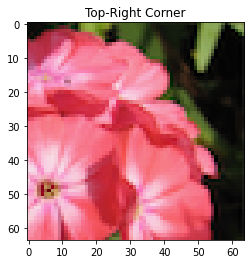

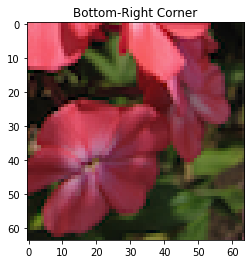

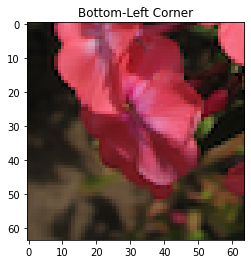

In [ ]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

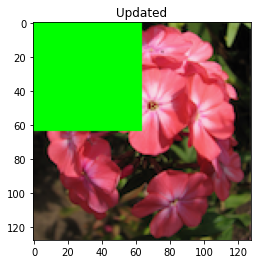

In [ ]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

**Read write image**

In [ ]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 128 pixels
height: 128  pixels
channels: 3


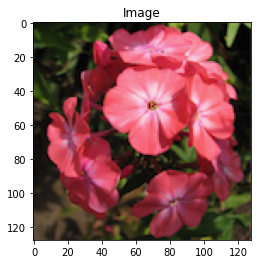

True

In [ ]:
# show the image and wait for a keypress
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("00_001.png", image)

**Rezise**

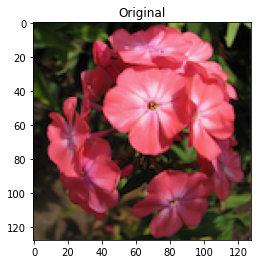

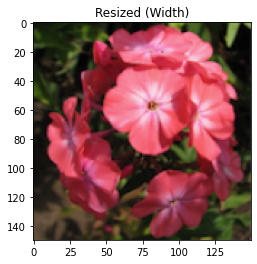

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

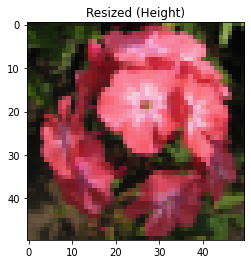

In [ ]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

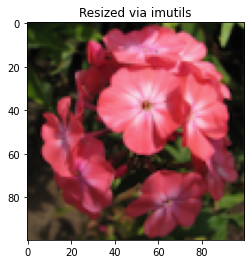

In [ ]:
import imutils

resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


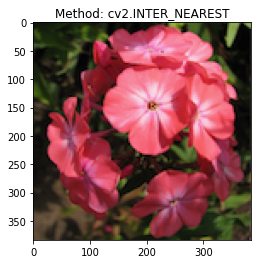

[INFO] cv2.INTER_LINEAR


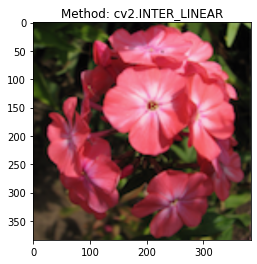

[INFO] cv2.INTER_AREA


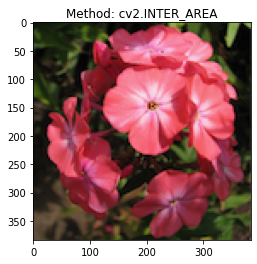

[INFO] cv2.INTER_CUBIC


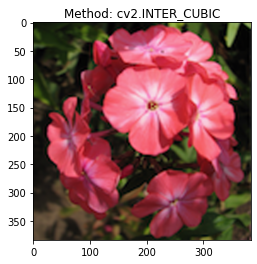

[INFO] cv2.INTER_LANCZOS4


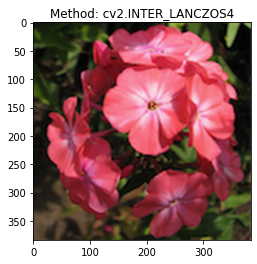

In [ ]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)

**Rotate**

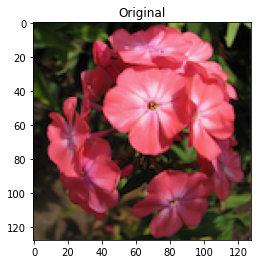

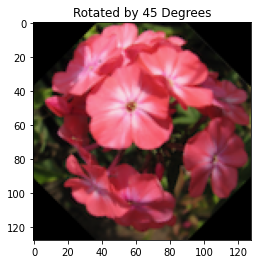

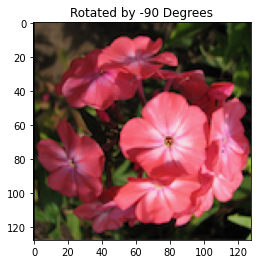

In [ ]:
# load the image and show it
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

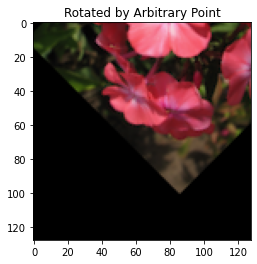

In [ ]:
# rotate our image around an arbitrary point rather than the center
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

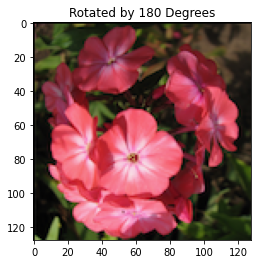

In [ ]:
# use our imutils function to rotate an image 180 degrees
rotated = imutils.rotate(image, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

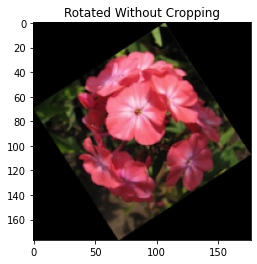

In [ ]:
# rotate our image by 33 degrees counterclockwise, ensuring the
# entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated Without Cropping", rotated)

**Split merge**

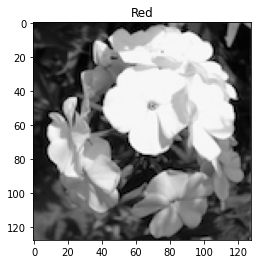

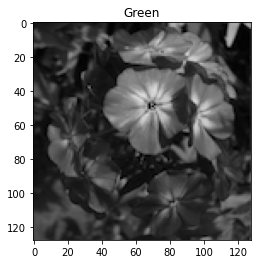

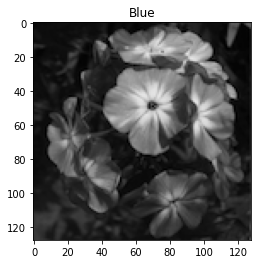

In [ ]:
# load the input image and grab each channel -- note how OpenCV
# represents images as NumPy arrays with channels in Blue, Green,
# Red ordering rather than Red, Green Blue
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

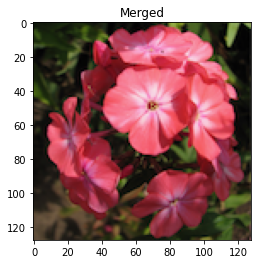

In [ ]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

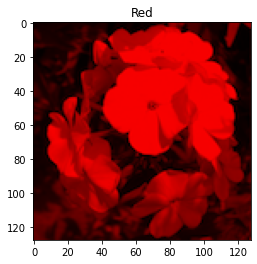

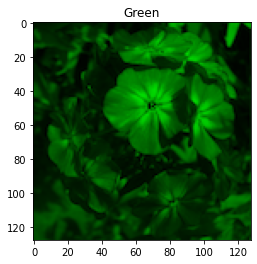

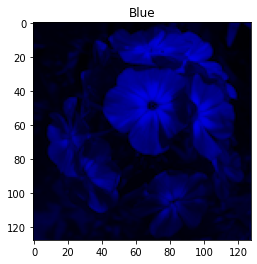

In [ ]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

**Translate**

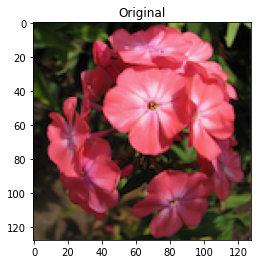

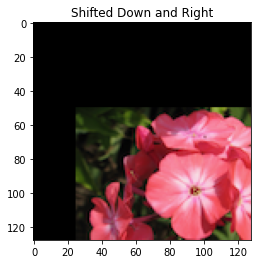

In [ ]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)